<a href="https://colab.research.google.com/github/gmehra123/PORTFOLIO/blob/main/Intro_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Optimization

In [ ]:
import pandas as pd
import numpy as np
from sympy import symbols,diff,solve

### Univariate optimization
* The slope is the rate of change of the function (rule that maps inputs onto outputs)
* If the dependent variable only depends on one independent variable then its called **univariate** function
* The first derivative gives us the slope or rate of change of the y wrt x, denoted as dy/dx
* In the below equation it will be dp_dq
* whenever the derivative = 0 we are at a critical point. Critical points are ideal points for finding maxima or minima
* If the function is concave then the crtical point is some sort of **maxima**
* If the function is convex then the critical point is some sort of **minima**
* A second derivative above 0 indicates a **minima**
* A second derivative below 0 indicates a **maxima**

In [ ]:
# Finding the firs derivative using sympy
q = symbols('q')
P = 40*q - 0.5*q**2
dp_dq = diff(P)
print(f"The drivative is: {dp_dq}")
q_opt = solve(dp_dq)[0]
print(f"The ideal quantity is {q_opt}")
d2p_d2q = diff(dp_dq)
print(f"the second derivative is {d2p_d2q}")
sol = d2p_d2q.subs('q',q_opt)

The drivative is: 40 - 1.0*q
The ideal quantity is 40.0000000000000
the second derivative is -1.00000000000000


### Multivariate Optimization
* If the dependent variable is dependent on more than 1 dependent variable it is multivariate optimization
* In the case of multivariate optimization we need to find the partial derivatives. Partial derivatives tell us how the slope of the function chnages wrt to each independent variable
* Some kinds of optimization problems cannot be solved through diffrentiation
  * Discontinous functions which are not differentiable
  * Any functions that are increasing or decreasing indefinetely without clear maxima or minima
  

In [ ]:
# Multivariate optimization
K,L = symbols('K L')
F = -3*K**2 + 100* K - (1/2)*L**2 + 100*L
dF_dK = diff(F,K)
dF_dL = diff(F,L)
crit_points = solve([dF_dK,dF_dL],(K,L))
print(crit_points)
K_val = crit_points[K]
L_val = crit_points[L]
sol = F.subs({K:K_val,L:L_val})
print(sol)

{K: 16.6666666666667, L: 100.000000000000}
5833.33333333333


In [ ]:
!pip install scipy

In [ ]:
# Unconstrained optimization using scipy
from scipy.optimize import minimize_scalar
def objective_function(x):
  return x**2-9*x+3

result = minimize_scalar(objective_function)
print(result)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -17.249999999999996
       x: 4.500000000000002
     nit: 4
    nfev: 9


In [ ]:
# Now using a function of 2 variables
from scipy.optimize import minimize
def objective_function(a):
  return ((a[0]-2)**2 + (a[1]-3)**2)

result = minimize(objective_function,[1,2])
print(result.x)


[1.99999999 2.99999999]


In [ ]:
x = symbols('x')
Y = x**2-9*x+3
dy_dx = diff(Y)
print(f"dy_dx is {dy_dx}")


dy_dx is 2*x - 9


### Bound constrained optimization
* In bound constrained problems the input variables are bound in some way.
* They might have upper and lower bounds
* lets look at a biscuit factory that produces vanilla and choclate biscuits. b[0] is vanilla b[1] is chocolate
  * b[0] between 5 and 25
  * b[1] between 10 and 30

In [ ]:
# Now introducing bounds on the variables
from scipy.optimize import minimize,Bounds
def objective_function(b):
  return (2*b[0] - 1.5*b[1])

bounds = Bounds([5,10],[25,30])
x0 = [5,8]

result = minimize(objective_function,x0,bounds=bounds,method='L-BFGS-B')
print(result.x[0],result.x[1])

5.0 30.0


In [ ]:
# Now adding a Linear constraint
def objective_function(b):
  return (b[0] - 5) ** 2 + (b[1] - 3) ** 3

def constraint_function(x):
    return 2*x[0] + 3*x[1] - 6

# Set the constraint variable
constraint = {'type':'ineq','fun':constraint_function}

x0 = [20, 20]

# Find the minimum
result = minimize(objective_function,x0,constraints=[constraint])

print(result)

 message: Inequality constraints incompatible
 success: False
  status: 4
     fun: -5596424370440672.0
       x: [ 2.665e+05 -1.775e+05]
     nit: 3
     jac: [ 0.000e+00  9.456e+10]
    nfev: 9
    njev: 3


### Pulp Problem

PuLP for linear optimization
A farmer faces a diet problem for their cattle. The vet's recommendation is that each animal is fed at least 7 pounds of a mix of corn and soybean with at least 17% protein and 2% fat. Below are the relevant nutritional elements:

|Food type|Cost ($/lb)|Protein (%)|Fat (%)|
|---------|-----------|-----------|-------|
|corn     |	0.11      |	10        |	2.5   |
|soybean  |	0.28      |	40        |1      |

You will use this information to minimize costs subject to nutritional constraints.

pulp has been imported for you.

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 32.2 MB/s eta 0:00:00


#### Simple solution for LP problem using pulp

In [ ]:
from pulp import *

In [ ]:
# Now setting up the model in pulp
model = LpProblem('Minimize_Cost',LpMinimize)

In [ ]:
# Define variable
C = LpVariable('C',lowBound=0)
S = LpVariable('S',lowBound=0)

In [ ]:
model += 0.11*C + 0.28*S
model += 40*S + 10*C >= 17*(C+S)
model += 2.5*C + 1*S >= 2*(C+S)
model += C+S>=7

In [ ]:
model

Minimize_Cost:
MINIMIZE
0.11*C + 0.28*S + 0.0
SUBJECT TO
_C1: - 7 C + 23 S >= 0

_C2: 0.5 C - S >= 0

_C3: C + S >= 7

VARIABLES
C Continuous
S Continuous

In [ ]:
print(f"model is solved {model.solve()}")
print(f"minimized cost is {value(model.objective)}")
for v in model.variables():
  print(v,v.varValue)

model is solved 1
minimized cost is 1.047666661
C 5.3666667
S 1.6333333


##### Problem 2
Resourcing Problem
We’re consulting for a boutique car manufacturer, producing luxury cars.

They run on one month (30 days) cycles, we have one cycle to show we can provide value.

There is one robot, 2 engineers and one detailer in the factory. The detailer has some holiday off, so only has 21 days available.

The 2 cars need different time with each resource:

Robot time: Car A – 3 days; Car B – 4 days.

Engineer time: Car A – 5 days; Car B – 6 days.

Detailer time: Car A – 1.5 days; Car B – 3 days.

Car A provides €30,000 profit, whilst Car B offers €45,000 profit.

At the moment, they produce 4 of each cars per month, for €300,000 profit. Not bad at all, but we think we can do better for them.

In [ ]:
products = ['Car_A','Car_B']
profits = [30000,45000]
model = LpProblem('Maximize_profit',LpMaximize)

In [ ]:
vars = LpVariable.dicts('Product_type',[i for i in products],lowBound=0,cat='Integer')

In [ ]:
model += vars['Car_A']*30000 + vars['Car_B']*45000

In [ ]:
# Constarints
model += 3*vars['Car_A'] + 4*vars['Car_B']<=30
model += 5*vars['Car_A'] + 6*vars['Car_B']<=60
model += 1.5*vars['Car_A'] + 3*vars['Car_B']<=21

In [ ]:
model

Maximize_profit:
MAXIMIZE
30000*Product_type_Car_A + 45000*Product_type_Car_B + 0
SUBJECT TO
_C1: 3 Product_type_Car_A + 4 Product_type_Car_B <= 30

_C2: 5 Product_type_Car_A + 6 Product_type_Car_B <= 60

_C3: 1.5 Product_type_Car_A + 3 Product_type_Car_B <= 21

VARIABLES
0 <= Product_type_Car_A Integer
0 <= Product_type_Car_B Integer

In [ ]:
model.solve()

1

In [ ]:
print(f"Optimal value is {value(model.objective)}")
print(f"model A production is {model.variables()[0].varValue}")
print(f"model B production is {model.variables()[1].varValue}")

Optimal value is 330000.0
model A production is 2.0
model B production is 6.0


#### Problem 3
Linear Programming with Python and PuLP – Part 4
Post author:Ben Keen
Post published:1st April 2016
Post category:Python
Linear Programming with Python and PuLP – Part 4
Real world examples – Blending Problem
We’re going to make some sausages!

We have the following ingredients available to us:

|Ingredient	Cost| (€/kg)	|Availability (kg)|
|---------------|---------| ----------------|
|Pork	          | 4.32	  |     30          |
|Wheat	        | 2.46	  |     20          |
|Starch	        | 1.86	  |     17          |

We’ll make 2 types of sausage:

Economy (>40% Pork)
Premium (>60% Pork)
One sausage is 50 grams (0.05 kg)

According to government regulations, the most starch we can use in our sausages is 25%

We have a contract with a butcher, and have already purchased 23 kg pork, that must go in our sausages.

We have a demand for 350 economy sausages and 500 premium sausages.

We need to figure out how to most cost effectively blend our sausages.

In [ ]:
model =LpProblem('Minimize_cost', LpMinimize)

In [ ]:
materials = ['pork','wheat','starch']
seg = ['eco','premium']

In [ ]:
var = LpVariable.dicts(name='type',indices=[(i,j) for i in materials for j in seg],lowBound=0,cat='Continuous')

In [ ]:
var

{('pork', 'eco'): type_('pork',_'eco'),
 ('pork', 'premium'): type_('pork',_'premium'),
 ('wheat', 'eco'): type_('wheat',_'eco'),
 ('wheat', 'premium'): type_('wheat',_'premium'),
 ('starch', 'eco'): type_('starch',_'eco'),
 ('starch', 'premium'): type_('starch',_'premium')}

In [ ]:
# Modelling the Objective function
model += lpSum([4.32*var[('pork',i)] + 2.46*var[('wheat',i)] + 1.86*var[('starch',i)] for i in seg])

In [ ]:
#Availability constraint
model += lpSum([var[('pork',i)] for i in seg])<=30
model += lpSum([var[('wheat',i)] for i in seg])<=20
model += lpSum([var[('starch',i)] for i in seg])<=17

In [ ]:
#Deamand constraint
model += lpSum([var[(j,'eco')] for j in materials]) == 350*0.05
model += lpSum([var[(j,'premium')] for j in materials]) == 500*0.05

In [ ]:
#Pork Mix constraint
model += var[('pork','eco')]>= 0.4* lpSum([var[(i,'eco')] for i in materials])
model += var[('pork','premium')]>= 0.6* lpSum([var[(i,'premium')] for i in materials])

In [ ]:
# Starch constraint
model += var[('starch','premium')]<=0.25* lpSum([var[(i,'premium')] for i in materials])
model += var[('starch','eco')]<=0.25* lpSum([var[(i,'eco')] for i in materials])

In [ ]:
# At least 23 g of Pork
model += lpSum([var[('pork',i)] for i in seg]) >= 23

In [ ]:
model

Minimize_cost:
MINIMIZE
4.32*type_('pork',_'eco') + 4.32*type_('pork',_'premium') + 1.86*type_('starch',_'eco') + 1.86*type_('starch',_'premium') + 2.46*type_('wheat',_'eco') + 2.46*type_('wheat',_'premium') + 0.0
SUBJECT TO
_C1: type_('pork',_'eco') + type_('pork',_'premium') <= 30

_C2: type_('wheat',_'eco') + type_('wheat',_'premium') <= 20

_C3: type_('starch',_'eco') + type_('starch',_'premium') <= 17

_C4: type_('pork',_'eco') + type_('starch',_'eco') + type_('wheat',_'eco')
 = 17.5

_C5: type_('pork',_'premium') + type_('starch',_'premium')
 + type_('wheat',_'premium') = 25

_C6: 0.6 type_('pork',_'eco') - 0.4 type_('starch',_'eco')
 - 0.4 type_('wheat',_'eco') >= 0

_C7: 0.4 type_('pork',_'premium') - 0.6 type_('starch',_'premium')
 - 0.6 type_('wheat',_'premium') >= 0

_C8: - 0.25 type_('pork',_'premium') + 0.75 type_('starch',_'premium')
 - 0.25 type_('wheat',_'premium') <= 0

_C9: - 0.25 type_('pork',_'eco') + 0.75 type_('starch',_'eco')
 - 0.25 type_('wheat',_'eco') <= 0

_

In [ ]:
model.solve()
LpStatus[model.status]

'Optimal'

In [ ]:
print(f"Optimal cost is {value(model.objective)}")

for v in model.variables():
  print(f"{v} optimal value is {value(v)}")

Optimal cost is 140.955
type_('pork',_'eco') optimal value is 7.0
type_('pork',_'premium') optimal value is 16.0
type_('starch',_'eco') optimal value is 4.375
type_('starch',_'premium') optimal value is 6.25
type_('wheat',_'eco') optimal value is 6.125
type_('wheat',_'premium') optimal value is 2.75


### Convex constrained Optimization

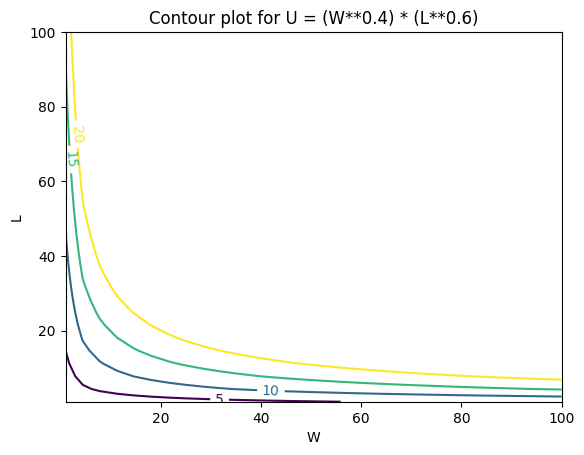

In [ ]:
# Utility function to maximize
import numpy
import matplotlib.pyplot as plt
w = np.linspace(1,100,30)
l = np.linspace(1,100,30)
W,L = np.meshgrid(w,l)
U = (W**0.4) * (L**0.6)
fig,ax = plt.subplots()
contours=ax.contour(W,L,U,levels=[5,10,15,20])
plt.clabel(contours)
ax.set_title("Contour plot for U = (W**0.4) * (L**0.6)")
ax.set_xlabel("W")
ax.set_ylabel("L")
plt.show()

In [ ]:
# Now lets do the optimization of this using scipy
from scipy.optimize import minimize,Bounds
def objective_function(vars):
  w,l = vars
  return -(w**0.4 * l**0.6)

def constraint_func(vars):
  return 24-np.sum(vars)

In [ ]:
initial_guess = [12,12]
constraints = {'type':'eq','fun':constraint_func}
result = minimize(objective_function,initial_guess,constraints=constraints)
w,l = result.x

In [ ]:
print(f"Optimal work hours is {w}")
print(f"Optimal leisure hours is {l}")

Optimal work hours is 9.600011217702765
Optimal leisure hours is 14.399988782297235


### Now using LinearConstraint

In [ ]:
from scipy.optimize import minimize,Bounds,LinearConstraint
def objective_function(vars):
  w,l = vars
  return -(w**0.4 * l**0.6)

In [ ]:
constraints = LinearConstraint([1,1],lb=0,ub=24)
result = minimize(objective_function,initial_guess,constraints=constraints)

In [ ]:
w,l = result.x

In [ ]:
print(w,l)

9.600013769841553 14.399986230158447


### Non Linear optimization
##### Problem
* car maker produces cars in 2 plants A and B
* Plant capacity is 90
  * Qa<=90 and Qb<=90
* Production cost is 3Q in plant A and 3.5Q in plant B.
  * Total cost = 3Qa +3.5Qb
* Price function is
  * P = 120-Q
  * P = 120-(Qa+Qb)
* Minimum of 92 cars
  * Q>=92
  * Qa + Qb >=92
* Pr = Revenue-Cost
* R = [120-(Qa+Qb)]*(Qa+Qb)
* C = 3Qa +3.5Qb

In [ ]:
from scipy.optimize import minimize,Bounds,LinearConstraint

In [ ]:
# Defining the Non Linear profit objective function
def rev(vars):
  qa,qb = vars
  return ((120-(qa+qb))*(qa+qb))

def cost(vars):
  qa,qb = vars
  return 3*qa + 3.5*qb

def profit(vars):
  qa,qb = vars
  return rev(vars) - cost(vars)

In [ ]:
# Defining constraints and bounds
bounds = Bounds([0,0],[90,90])
constraints = LinearConstraint([1,1],lb=92)
result = minimize(lambda q: -profit(q),[50,50],bounds=bounds,constraints=constraints)

In [ ]:
print(result.message)
print(f"Max profit is {-result.fun:.2f}")
print(f"Optimal A is {result.x[0]:.2f} ans Optimal B is {result.x[1]:.2f}")

Optimization terminated successfully
Max profit is 2299.00
Optimal A is 90.00 ans Optimal B is 2.00
